# Medical Cost Personal Insurance Project

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


## Importing Datset

In [2]:
df=pd.read_csv("C:\\Users\\KHUSHBOO RANI\\OneDrive\\Desktop\\Projects\\ML project\\medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


I can observe that the provided dataset have 1338 rows and 7 columns.

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
451,30,male,24.130,1,no,northwest,4032.24070
612,18,female,33.155,0,no,northeast,2207.69745
42,41,male,21.780,1,no,southeast,6272.47720
1180,42,female,41.325,1,no,northeast,7650.77375
170,63,male,41.470,0,no,southeast,13405.39030
615,47,female,36.630,1,yes,southeast,42969.85270
1080,18,male,21.780,2,no,southeast,11884.04858
729,41,female,36.080,1,no,southeast,6781.35420
193,56,female,26.600,1,no,northwest,12044.34200
357,47,male,29.830,3,no,northwest,9620.33070


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


I can see that there is 2 Columns contains float values, 3 contains categorical values and  rest 2 columns contains int values.



##  Exploratry Data Analysis (EDA)

In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [9]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null values presnt in this dataset

In [11]:
df.loc[df["charges"]==" "].count()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
for i in df.columns:
    print(df.loc[df["charges"]==" "].count())
    print(' ')

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
 


There is no blank values present in dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Separating Categorical Columns
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print("Categorical columns:", categorical_columns)

# Separating Numerical Columns
numerical_columns = [col for col in df.columns if df[col].dtype != "object"]
print("Numerical columns:", numerical_columns)


Categorical columns: ['sex', 'smoker', 'region']
Numerical columns: ['age', 'bmi', 'children', 'charges']


In [15]:
print(categorical_columns)
print(numerical_columns)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


(sex, smoker and region) ------ are catogerical columns                            
(age, bmi, children and charges) ------- are numerical columns.

In [16]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


## Description of Dataset

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present

From the above description we can observe the following:

The counts of all the columns are same which means there are no missing values in the dataset.

The Mean is greater than meadian(50%) it mean the data is left skewed.

and the max values is higher than 75% in age bmi children and there is huge difference in charges


# Visualizing catogerical data 

<function matplotlib.pyplot.show(close=None, block=None)>

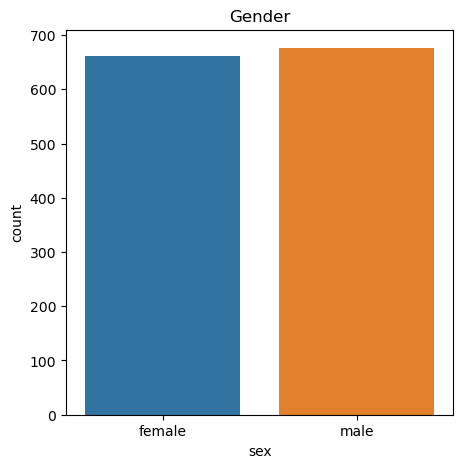

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x="sex", data=df)
plt.title("Gender")
plt.show

As we can see above almost male and female booth in equal in data

<function matplotlib.pyplot.show(close=None, block=None)>

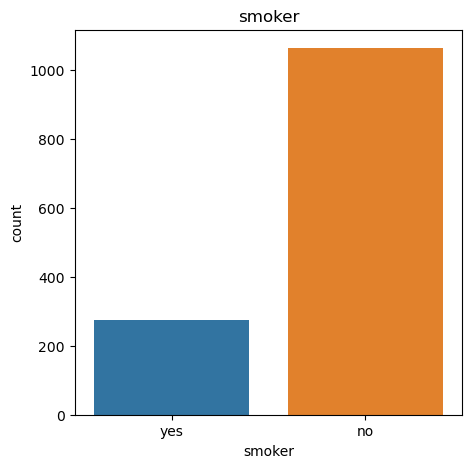

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x="smoker", data=df)
plt.title("smoker")
plt.show

In [20]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

There is more number of yes smokers than the no smokers

<function matplotlib.pyplot.show(close=None, block=None)>

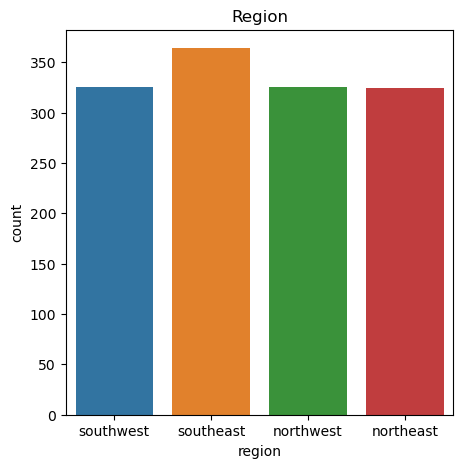

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x="region", data=df)
plt.title("Region")
plt.show

there is higher numbers of peoples in southeast then others regiuons and rest of the reason are almost equal numbers of people

<function matplotlib.pyplot.show(close=None, block=None)>

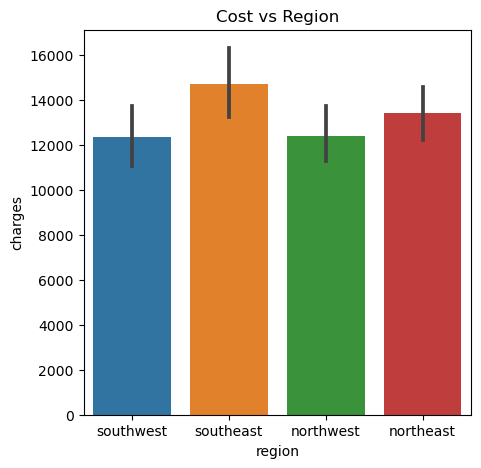

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(x="region",y="charges", data=df)
plt.title("Cost vs Region")
plt.show

The people living in southeast have higher medical chareges comared to others 

<function matplotlib.pyplot.show(close=None, block=None)>

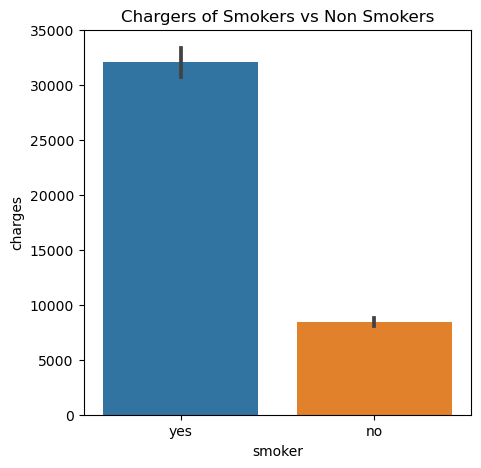

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(x="smoker",y="charges", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

In [24]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are much higher chares of smokers than the non smokers

<function matplotlib.pyplot.show(close=None, block=None)>

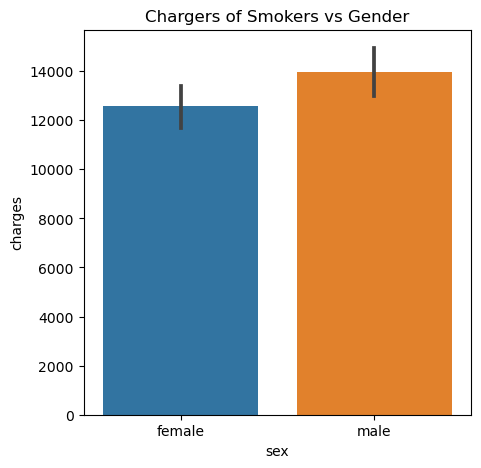

In [25]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges", data=df)
plt.title("Chargers of Smokers vs Gender")
plt.show

Male have higher charges than females

<function matplotlib.pyplot.show(close=None, block=None)>

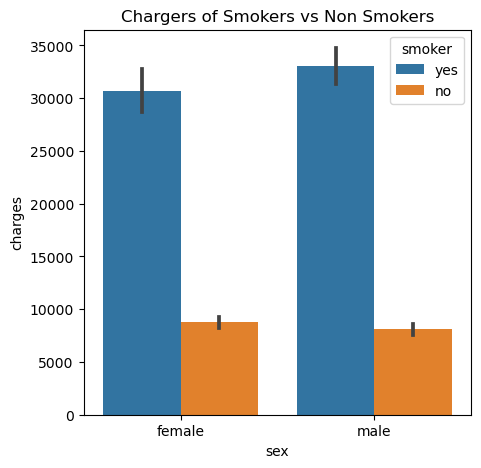

In [26]:
plt.figure(figsize=(5,5))
sns.barplot(x="sex",y="charges",hue="smoker", data=df)
plt.title("Chargers of Smokers vs Non Smokers")
plt.show

Male who are smokers are higer charges than the females who are  smokers
but males who is not smokers have lower chages than the female who are not smokers

<function matplotlib.pyplot.show(close=None, block=None)>

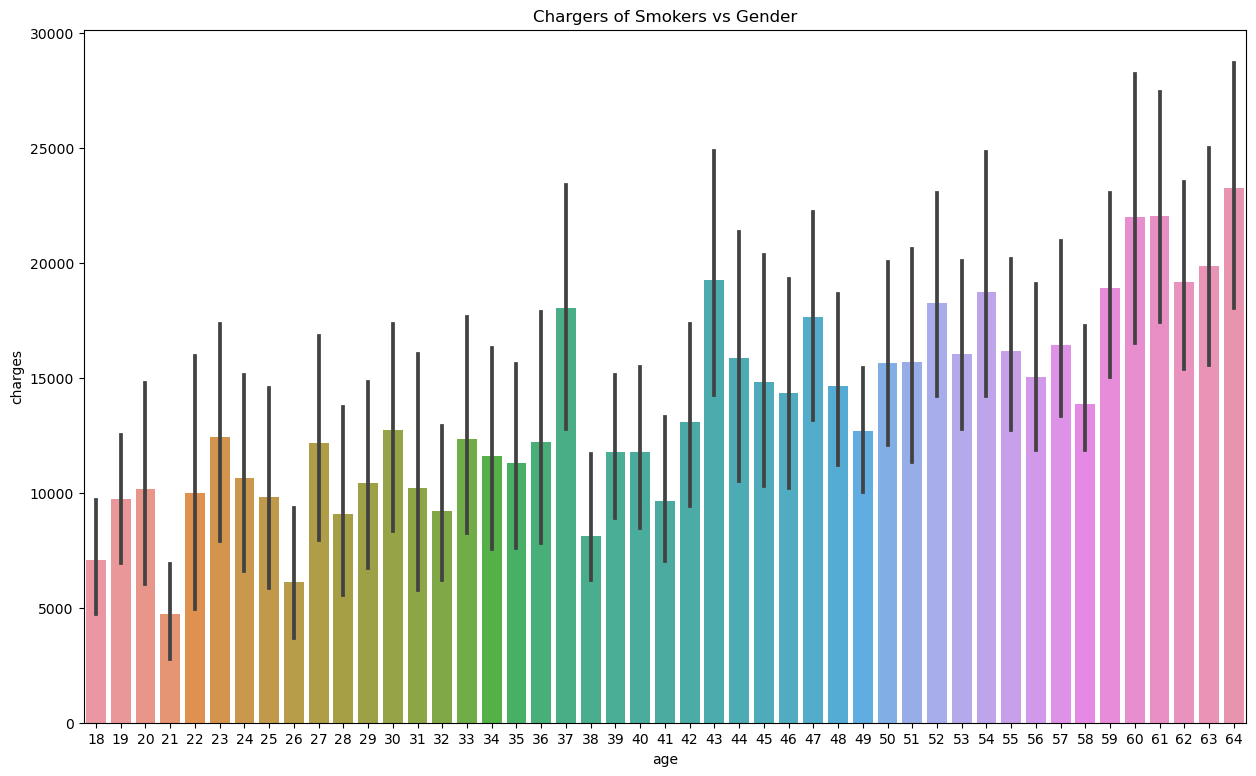

In [27]:
plt.figure(figsize=(15,9))
sns.barplot(x="age",y="charges", data=df)
plt.title("Chargers of Smokers vs Gender")
plt.show

As the age is increasing the charges is also increasing

# Visualizing Numerical data 

In [28]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


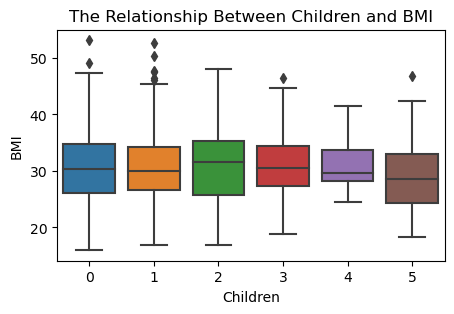

In [29]:
plt.figure(figsize=(5,3))
sns.boxplot(x="children", y="bmi", data=df)
plt.title("The Relationship Between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.show()

children who is 2 years old have more bmi than others

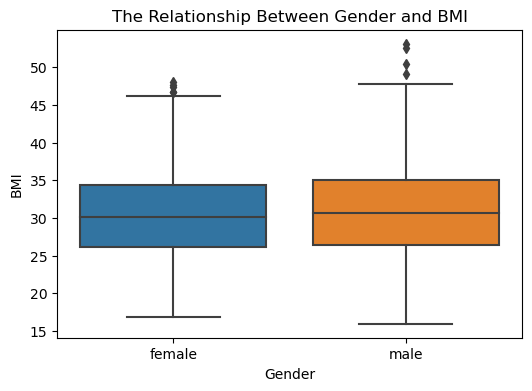

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("The Relationship Between Gender and BMI")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

Genger male have more bmi

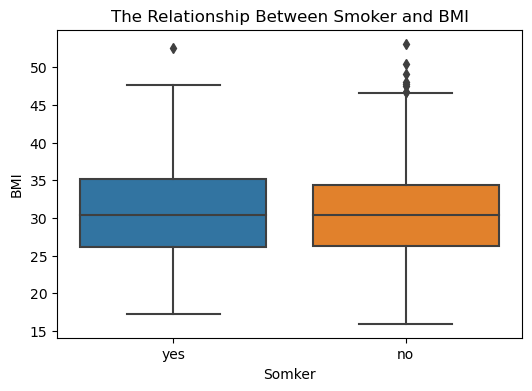

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="bmi", data=df)
plt.title("The Relationship Between Smoker and BMI")
plt.xlabel("Somker")
plt.ylabel("BMI")
plt.show()

Smokers have more bmi

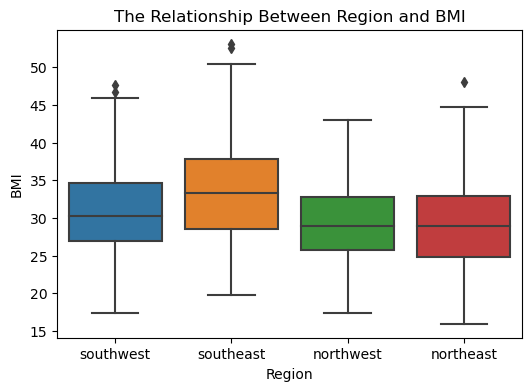

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="bmi", data=df)
plt.title("The Relationship Between Region and BMI")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.show()

Southeast people have more bmi

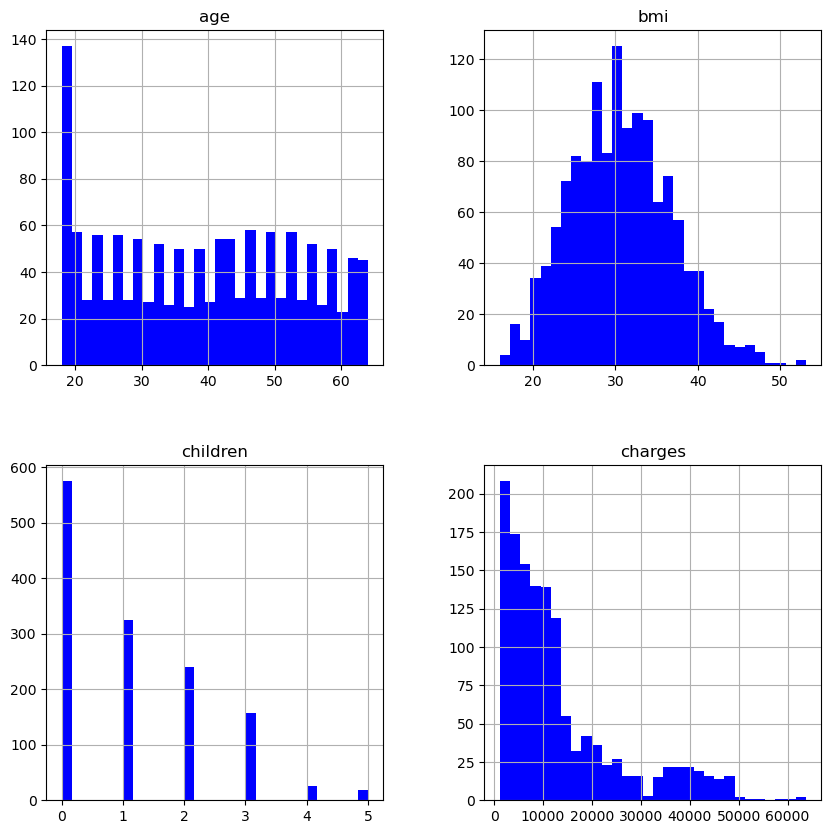

In [33]:
df[numerical_columns].hist(bins=30, figsize=(10,10),color="blue")
plt.show()

1. In age columns there is more number of peoples are in age group of betweeen 10 and 20.
2. In bmi there is more people in  age group of 25 to 35.
3. In children column there are more number of people who dont't have any childre and tere are fev people have have more than 4-5 childrens.
4. In charges columns there are more people whose charges is 10000 and very fev have more than 50000 to 60000

# Checking outliers

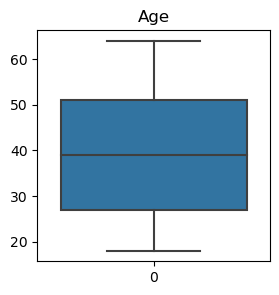

In [34]:
plt.figure(figsize=(3,3))
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

there is no outliers

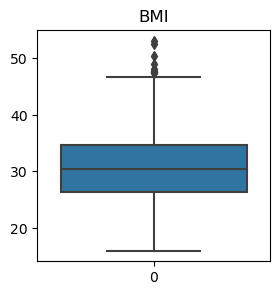

In [35]:
plt.figure(figsize=(3,3))
sns.boxplot(df['bmi'])
plt.title("BMI")
plt.show()

There are some outliers in bmi column

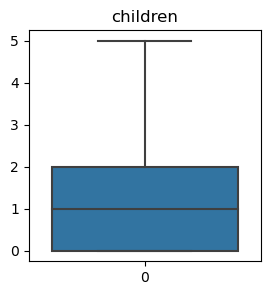

In [36]:
plt.figure(figsize=(3,3))
sns.boxplot(df['children'])
plt.title("children")
plt.show()


There is no outliers

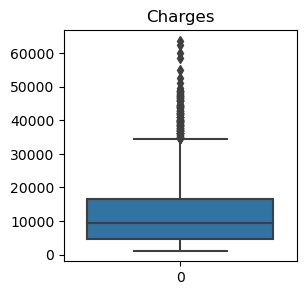

In [37]:
plt.figure(figsize=(3,3))
sns.boxplot(df['charges'])
plt.title("Charges")
plt.show()

<Axes: >

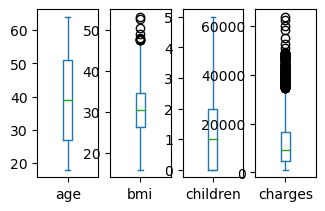

In [38]:
df.plot(kind='box',subplots=True,layout=(2,7))
sns.boxplot(notch=True, showcaps=False)


There are some outliers in bmi and charges columns

## Removing Outliers

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df[numerical_columns]))


In [40]:
#threshold from zscore values__________> above 3 are consider outlier
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 3, 1], dtype=int64))


In [41]:
new_df=df[(z<3).all(axis=1)]  #removing outliers

age            Axes(0.125,0.53;0.0945122x0.35)
bmi         Axes(0.238415,0.53;0.0945122x0.35)
children    Axes(0.351829,0.53;0.0945122x0.35)
charges     Axes(0.465244,0.53;0.0945122x0.35)
dtype: object

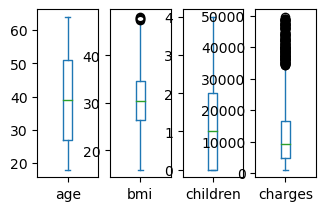

In [42]:
new_df.plot(kind='box',subplots=True,layout=(2,7))

In [43]:
new_df.shape

(1309, 7)

In [44]:
new_df.skew()

age         0.051340
bmi         0.191432
children    0.738119
charges     1.437160
dtype: float64

In [45]:
#Removing skewness using cuberoot method
new_df["children"]=np.cbrt(new_df["children"])

In [46]:
new_df["bmi"]=np.cbrt(new_df["bmi"])


In [47]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# Convert catogerical values in numerical values

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Encode using Label encoder beause it have more than 2 catogerical values in region column

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()
new_df['sex']=le.fit_transform(new_df['sex'])
new_df['smoker']=le.fit_transform(new_df['smoker'])
new_df['region']=le.fit_transform(new_df['region'])

list1=['sex','smoker','region']       #this can be use if there is any float or int value is present 
for val in list1:
    new_df[val]=le.fit_transform(new_df[val].astype(str))
    
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.032970,0.00000,1,3,16884.92400
1,18,1,3.232290,1.00000,0,2,1725.55230
2,28,1,3.207534,1.44225,0,2,4449.46200
3,33,1,2.831656,0.00000,0,1,21984.47061
4,32,1,3.068073,0.00000,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,3.140367,1.44225,0,1,10600.54830
1334,18,0,3.172154,0.00000,0,0,2205.98080
1335,18,0,3.327713,0.00000,0,2,1629.83350
1336,21,0,2.954880,0.00000,0,3,2007.94500


In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1309 non-null   int64  
 1   sex       1309 non-null   int32  
 2   bmi       1309 non-null   float64
 3   children  1309 non-null   float64
 4   smoker    1309 non-null   int32  
 5   region    1309 non-null   int32  
 6   charges   1309 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 66.5 KB


In [52]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.032970,0.00000,1,3,16884.92400
1,18,1,3.232290,1.00000,0,2,1725.55230
2,28,1,3.207534,1.44225,0,2,4449.46200
3,33,1,2.831656,0.00000,0,1,21984.47061
4,32,1,3.068073,0.00000,0,1,3866.85520


In [53]:
new_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019253,0.121578,0.059031,-0.029090,0.003121,0.305263
sex,-0.019253,1.000000,0.042854,0.014302,0.079058,0.003084,0.059455
bmi,0.121578,0.042854,1.000000,0.025584,-0.006648,0.161741,0.192632
children,0.059031,0.014302,0.025584,1.000000,0.022694,0.005582,0.091228
smoker,-0.029090,0.079058,-0.006648,0.022694,1.000000,-0.003474,0.785129
region,0.003121,0.003084,0.161741,0.005582,-0.003474,1.000000,-0.007633
charges,0.305263,0.059455,0.192632,0.091228,0.785129,-0.007633,1.000000


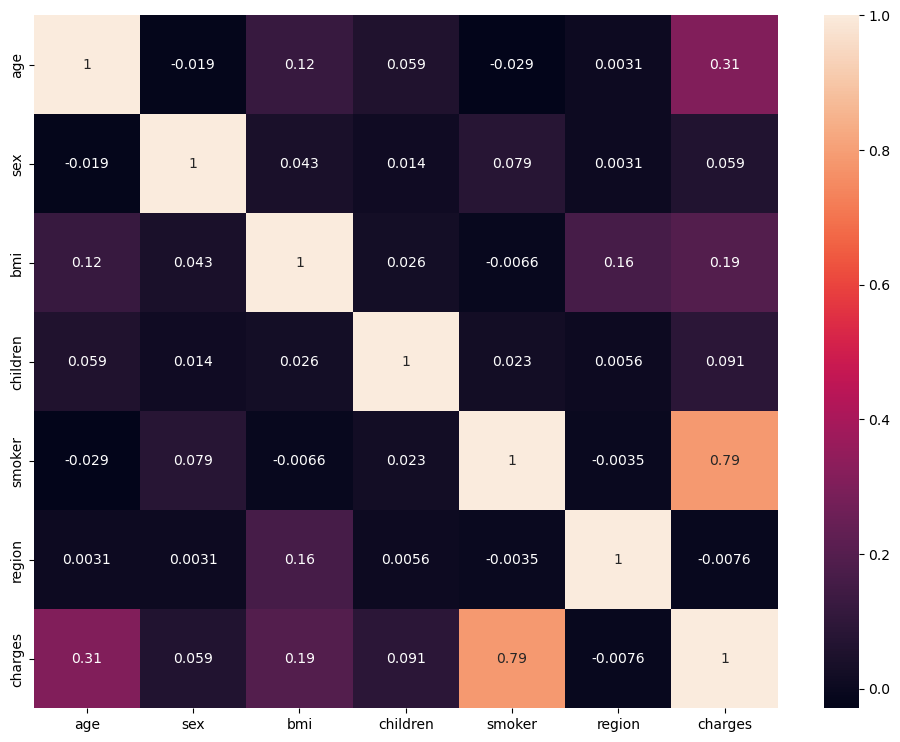

In [54]:
plt.figure(figsize=(12,9))
sns.heatmap(new_df.corr(),annot = True)
plt.show()

smoker have higher corelation to the target veriable that is charges and sex have very low corelation

# Spliting the data into x and y

In [55]:
x=new_df.iloc[:,0:-1]
y=new_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [56]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (916, 6)
y_train shape: (916,)
x_test shape: (393, 6)
y_test.shape: (393,)


## Linear regression

In [57]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)
print(LR.score(x_train,y_train)*100," %")
print(r2_score(y_test,pred_LR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean squared error:',mean_squared_error(y_test,pred_LR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_LR)))

74.360157697973  %
77.28698947620694  %
Mean absolute error: 4160.195273930486
Mean squared error: 32987539.932284806
Root mean squared error: 5743.478034456544


## KNeighborsRegressor

In [58]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
print('R2_score',r2_score(y_test,pred_KNN)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_KNN))
print('Mean squared error:',mean_squared_error(y_test,pred_KNN))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_KNN)))

R2_score 40.31610525184958  %
Mean absolute error: 5489.463812160306
Mean squared error: 86682690.48950812
Root mean squared error: 9310.353940077042


## Ridge Regression

In [59]:
RR = Ridge(alpha=10)
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)

print('R2_score',r2_score(y_test,pred_RR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RR))
print('Mean squared error:',mean_squared_error(y_test,pred_RR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RR)))

R2_score 76.62518852044742  %
Mean absolute error: 4222.971141783569
Mean squared error: 33948715.265359744
Root mean squared error: 5826.552605560148


## Lasso Regression

In [60]:
L = Lasso(alpha=0.001)
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

R2_score 77.28698661726857  %
Mean absolute error: 4160.1945642516985
Mean squared error: 32987544.084501583
Root mean squared error: 5743.4783959288625


## Decision Tree Regression

In [61]:
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)
print('R2_score',r2_score(y_test,pred_DTR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_DTR))
print('Mean squared error:',mean_squared_error(y_test,pred_DTR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score 86.441829877576  %
Mean absolute error: 2665.1795555860713
Mean squared error: 19691386.919125233
Root mean squared error: 4437.497821872731


## Support vector Regression

In [62]:
SV = SVR()
SV.fit(x_train, y_train)
pred_SVR = SV.predict(x_test)
print('R2_score',r2_score(y_test,pred_SVR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_SVR))
print('Mean squared error:',mean_squared_error(y_test,pred_SVR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score -12.267195970544641  %
Mean absolute error: 8443.118939826467
Mean squared error: 163052740.46716353
Root mean squared error: 12769.210643855928


## RandomForestRegressor

In [63]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
print('R2_score',r2_score(y_test,pred_RFR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean squared error:',mean_squared_error(y_test,pred_RFR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score 86.69883278067809  %
Mean absolute error: 2437.7217906491733
Mean squared error: 19318125.368442092
Root mean squared error: 4395.238943270558


## Gradient Boosting Regressor

In [64]:
GBR = GradientBoostingRegressor(n_estimators=100)
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
print('R2_score',r2_score(y_test,pred_GBR)*100," %")
print('Mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean squared error:',mean_squared_error(y_test,pred_GBR))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score 88.05336883514903  %
Mean absolute error: 2279.1912665262757
Mean squared error: 17350847.092417352
Root mean squared error: 4165.434802324645


## Gradient Boosting Regressor gives max Accuracy

In [65]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(GBR,x,y)
print("Cross-validation scores:", score)
print("Mean Cross-validation score:", np.mean(score))
print("Difference between R2 score and cross-validation:", (r2_score(y_test, pred_GBR) -score.mean() * 100))


Cross-validation scores: [0.8780829  0.8053917  0.8839137  0.84564808 0.86387169]
Mean Cross-validation score: 0.8553816144633342
Difference between R2 score and cross-validation: -84.65762775798193


## Saving The best model

In [66]:
import joblib
# Save the model as a objectfile

"joblib.dump(GBR,'Medical_Cost_Personal_Insurance')"   #already saved the model that is put this code as commen

"joblib.dump(GBR,'Medical_Cost_Personal_Insurance')"

In [67]:
Medical_Cost_Personal_Insurance=joblib.load(open("Medical_Cost_Personal_Insurance","rb"))


In [74]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,3.032970,0.00000,1,3,16884.92400
1,18,1,3.232290,1.00000,0,2,1725.55230
2,28,1,3.207534,1.44225,0,2,4449.46200
3,33,1,2.831656,0.00000,0,1,21984.47061
4,32,1,3.068073,0.00000,0,1,3866.85520


In [84]:
test = (19,0,3.032970,0.00000,1,3) #taking data from 1st row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = Medical_Cost_Personal_Insurance.predict(reshape)
print(pred)


[17615.95782617]
